In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install mpi4py
!pip install stable-baselines[mpi]

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074458 sha256=2b7154842c35d832d3c2136be64df9099959b1a8c5a2c3abfcb02b0d79857e3c
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
     |████████████████████████████████| 245kB 2.8MB/s 


In [2]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 51kB/s 
     |████████████████████████████████| 491kB 43.4MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 43.2MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


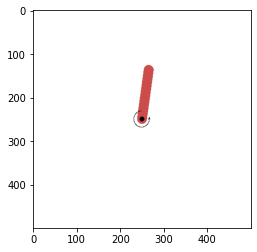

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines import TD3
from stable_baselines.td3.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.ddpg.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make('Pendulum-v0')

# The noise objects for TD3
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = TD3(MlpPolicy, env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=50000, log_interval=10)
model.save("td3_pendulum")

del model # remove to demonstrate saving and loading

model = TD3.load("td3_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
